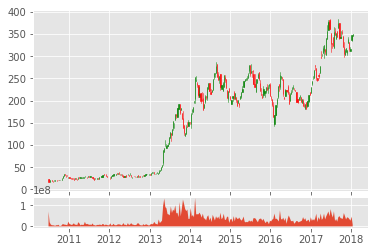

In [4]:
import datetime as dt
import matplotlib.pyplot as plt
from matplotlib import style
from matplotlib.finance import candlestick_ohlc
import matplotlib.dates as mdates
import pandas as pd
import pandas_datareader.data as web
style.use('ggplot')
#start = dt.datetime(2000, 1, 1)
#end = dt.datetime(2019, 1, 17)
#df = web.DataReader('TSLA', "yahoo", start, end)
#df.to_csv('tsla.csv')
df = pd.read_csv('tsla.csv', parse_dates=True, index_col=0)

df_ohlc = df['Adj Close'].resample('10D').ohlc()
df_volume = df['Volume'].resample('10D').sum()
#print(df_ohlc.head())
df_ohlc.reset_index(inplace = True)
df_ohlc['Date'] = df_ohlc['Date'].map(mdates.date2num)


ax1 = plt.subplot2grid((6,1),(0,0), rowspan = 5, colspan = 1)
ax2 = plt.subplot2grid((6,1),(5,0), rowspan = 5, colspan = 1, sharex= ax1)
#plt.show()
ax1.xaxis_date()
candlestick_ohlc(ax1, df_ohlc.values, width = 2, colorup='g')
ax2.fill_between(df_volume.index.map(mdates.date2num), df_volume.values, 0)
plt.show()